El objetivo del ejercicio actual es utilizar medidas físicas para predecir la
edad del abulón, usando el algoritmo K-NN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


1. Lo primero que debe hacer es eliminar la variable “Sex”.

In [3]:
abalone.drop('Sex', axis=1, inplace=True)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


2. Realice estadística descriptiva para el conjunto de datos entregados.

In [4]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


3. La variable objetivo es “Rings”, por lo que muestre la distribución de
estos datos e interprete.

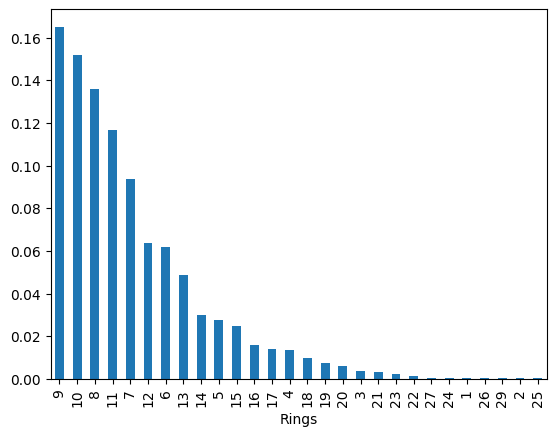

In [5]:
#calcular la distrubucion de los datos
distribucion = abalone['Rings'].value_counts() / len(abalone)

# graficar la distribucion de los datos
distribucion.plot(kind='bar')
plt.show()

Interpretacion:

La mayoría de los datos se concentran en el rango de 8 a 12 anillos.

4. Entregue la matriz de correlación ¿Qué variables pueden estar
correlacionadas?

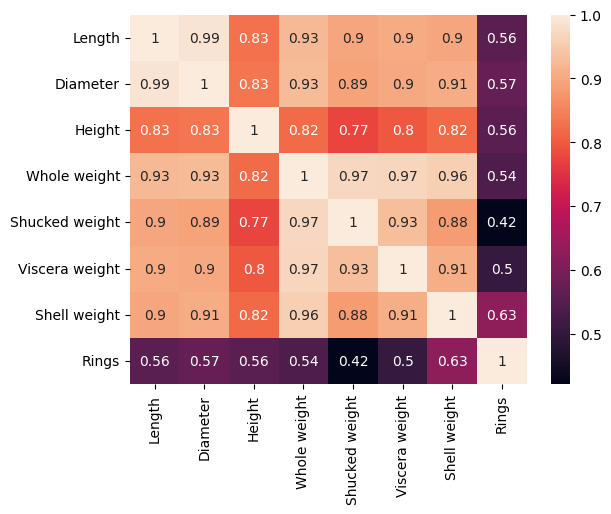

In [6]:
corr = abalone.corr()
sns.heatmap(corr, annot=True)
plt.show()

Todas las variables estan altamente correlacionadas.La variable que tiene mayor correlación con la variable objetivo es la variable "Shell weight".

5. Defina las distancias en los vectores de las variables independientes.
Para esto puede usar el atributo .values de Numpy

In [7]:
X = abalone.drop('Rings', axis=1).values # matriz de datos quitando la variable Rings
y = abalone['Rings'].values # vector de la variable Rings

print('La matriz X es:')
print (X.shape,type(X))
print()
print('El vector y es:')
print (y.shape,type(y))
print()

La matriz X es:
(4177, 7) <class 'numpy.ndarray'>

El vector y es:
(4177,) <class 'numpy.ndarray'>



6. Guarde los datos en una matriz y úselo en este código:

distances = np.linalg.norm(X - new_data_point, axis=1)


In [9]:
# calcular new_data_point
new_data_point = np.array([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208])
# new_data_point no existe, lo generamos nosotros

distances = np.linalg.norm(X - new_data_point, axis=1)

7. Determine cuáles son los tres vecinos más cercanos.

In [10]:
print('Las distancias son:')
print(distances)
print()

# ranking de las distancias
distancias_ordenadas = np.argsort(distances)

print('Los 3 Vecinos mas cercanos son:')
print(distancias_ordenadas[:3])
print()
print(distances[distancias_ordenadas[:3]])
abalone.iloc[distancias_ordenadas[:3]]

Las distancias son:
[0.59739395 0.9518455  0.40573594 ... 0.20397872 0.14342627 1.10583307]

Los 3 Vecinos mas cercanos son:
[4045 1902 1644]

[0.03195667 0.03459774 0.03850748]


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4045,0.590,0.450,0.160,0.9980,0.4450,0.2140,0.301,9
1902,0.575,0.455,0.155,1.0130,0.4685,0.2085,0.295,11
1644,0.580,0.460,0.155,1.0335,0.4690,0.2225,0.295,10
